In [3]:
import tensorflow as tf
import numpy as np

In [49]:
with tf.Session() as sess:
    x = tf.placeholder(tf.float32, shape=(None, 2), name='x')
    y_2 = tf.reduce_sum(tf.pow(x, 2), axis=1)
    y_3 = tf.reduce_sum(tf.pow(x, 3), axis=1)
    
    y = tf.stack([y_2,y_3], axis=1)
    x_input = np.array([3,2,4,5,7,6]).reshape(-1,2)

    print('------')
    res_y_2, res_y_3 = sess.run([y_2,y_3], feed_dict={x: x_input});
    print(res_y_2)
    print(res_y_3)
    print('------')
    max_pred = tf.reduce_max(y, axis=1)
    gradient = tf.gradients(y, x)
    grad_max_pred = tf.gradients(max_pred, x)
    
    res, grad_res, max_pred_res, grad_max_pred = sess.run([y, gradient, max_pred, grad_max_pred], feed_dict={x: x_input})
    
    
    print(x_input)
    print(res.shape)
    print(res)
    print('----- grad -----')
    print(grad_res)
    print('---- max_pred ----')
    print(max_pred_res)
    print('---- grad max pred')
    print(grad_max_pred)
#     print('x=%f , y=%f' %(x_input, res))

------
[ 13.  41.  85.]
[  35.  189.  559.]
------
[[3 2]
 [4 5]
 [7 6]]
(3, 2)
[[  13.   35.]
 [  41.  189.]
 [  85.  559.]]
----- grad -----
[array([[  33.,   16.],
       [  56.,   85.],
       [ 161.,  120.]], dtype=float32)]
---- max_pred ----
[  35.  189.  559.]
---- grad max pred
[array([[  27.,   12.],
       [  48.,   75.],
       [ 147.,  108.]], dtype=float32)]


In [21]:
grad_func = lambda x: 2*x + 3*(x**2)

In [28]:
grad_func(7)

161

In [5]:
np.prod([2,2,3])

12

In [7]:
input_layer = tf.placeholder(tf.float32, shape=(None,28,28,1))


In [29]:
conv1 = tf.layers.conv2d(
    inputs=input_layer,
    filters=32,
    kernel_size=[5, 5],
    padding="same",
    activation=tf.nn.relu, name='conv1')


ValueError: Variable conv1/kernel already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-18-e1bba69a732c>", line 6, in <module>
    activation=tf.nn.relu, name='conv1')
  File "/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):


In [30]:
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)


In [49]:
conv2 = tf.layers.conv2d(
    inputs=pool1,
    filters=64,
    kernel_size=[5, 5],
    padding="same",
    activation=tf.nn.relu, name='c2')

pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)


In [50]:
kernel = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, 'c2/kernel')
kernel

[<tf.Variable 'c2/kernel:0' shape=(5, 5, 32, 64) dtype=float32_ref>]

In [51]:
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, 'c2/bias')[0].shape

TensorShape([Dimension(64)])

In [47]:
conv2

<tf.Tensor 'conv2d_2/Relu:0' shape=(?, 14, 14, 64) dtype=float32>

In [46]:
pool2

<tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 7, 7, 64) dtype=float32>

In [59]:
a = 'a:5->22|b:5--recur:23'

In [60]:
import re
re.split('[\|(--)]', a)

['a:5', '>22', 'b:5', '', 'recur:23']

In [61]:
"conv1:5x5x32=>2x2[2,2]".split(":")

['conv1', '5x5x32=>2x2[2,2]']

In [62]:
s = 'conv1:5x5x32=>2x2[2,2]|conv2:5x5x64=>2x2[2,2]|hidden:30|out1:30|out2:10--recur:10'

In [68]:
re.split('[\|(\-+)]', s)

['conv1:5x5x32=>2x2[2,2]',
 'conv2:5x5x64=>2x2[2,2]',
 'hidden:30',
 'out1:30',
 'out2:10',
 '',
 'recur:10']

In [70]:
np.multiply.reduce([1,2,3,4])

24

In [46]:
with tf.Session() as sess:
    b = tf.constant(0.01)
    a = sess.run(tf.nn.softplus(b))
    print(a)

0.69816


In [42]:
np.log(1+np.exp(0))

0.69314718055994529

In [60]:
np.log(np.exp(0.01)-1)

-4.6001660193249077

In [57]:
with tf.Session() as sess:
    x_input = 2
    x = tf.placeholder(tf.float32, name='x')
    y_2 = tf.pow(x, 2)
    y_3 = tf.pow(y_2,3)
    y_4 = tf.pow(y_2,2)
    y_5 = y_3 + y_2
    sdy3_dx = tf.gradients(y_3, x)
    sdy2_dx = tf.gradients(y_2, x)
    sdy5_dx = tf.gradients(y_5, x)
    res = sess.run([x, y_2, sdy2_dx, sdy3_dx, sdy5_dx], feed_dict={x: x_input})
    
    
    
    print(res)

[array(2.0, dtype=float32), 4.0, [4.0], [192.0], [196.0]]


In [59]:
np.log(1+np.exp(-4.6001660193249077))

0.0099999999999998927

In [1]:
import matplotlib.pyplot as plt


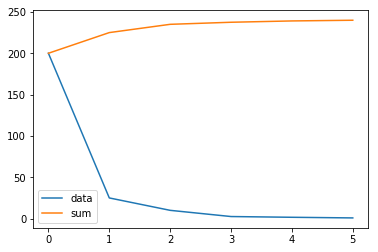

In [8]:
a = np.array([200, 50, 30, 10, 8, 5]) / np.arange(1, 7)
plt.plot(a, label='data')
plt.plot(np.cumsum(a), label='sum')
plt.legend()
plt.show()